<a href="https://colab.research.google.com/github/Famodpl/repo1/blob/main/deep1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
from tensorflow import keras
from keras.constraints import MaxNorm
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train[0]

array([6], dtype=uint8)

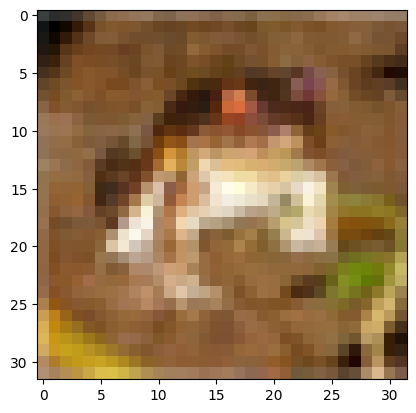

In [ ]:
plt.imshow(X_train[0])

In [ ]:
# Normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# One-hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [ ]:
num_class = y_test.shape[1] #10

In [ ]:
X_train.shape[1:]

(32, 32, 3)

# *MODEL*

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(num_class, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         262,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │              

 Total params: 393,962 (1.50 MB)

 Trainable params: 393,322 (1.50 MB)

 Non-trainable params: 640 (2.50 KB)

# *train* *model*

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=64)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - accuracy: 0.3824 - loss: 1.7472 - val_accuracy: 0.5455 - val_loss: 1.2554
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.5952 - loss: 1.1370 - val_accuracy: 0.6537 - val_loss: 0.9784
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.6765 - loss: 0.9240 - val_accuracy: 0.7422 - val_loss: 0.7349
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7081 - loss: 0.8277 - val_accuracy: 0.7485 - val_loss: 0.7187
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7411 - loss: 0.7534 - val_accuracy: 0.7365 - val_loss: 0.7513
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7600 - loss: 0.6933 - val_accuracy: 0.7548 - val_loss: 0.7013
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7714 - loss: 0.6539 - val_accuracy: 0.7688 - val_loss: 0.6531
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7822 - loss: 0.6260 - val_accu

In [ ]:
for key,val in history.history.items():
  print(key)

accuracy
loss
val_accuracy
val_loss


In [ ]:
import pandas as pd

<Axes: >

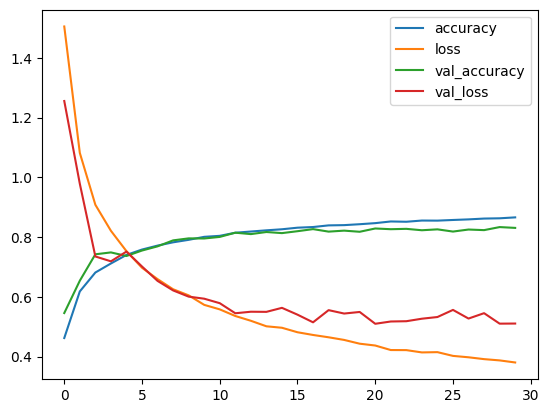

In [ ]:
pd.DataFrame(history.history).plot()

<function matplotlib.pyplot.show(close=None, block=None)>

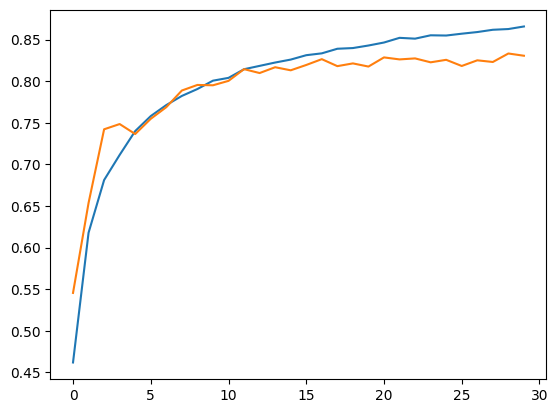

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show

In [ ]:
model.save('CNN_cifar10.h5')

In [ ]:
model2 = load_model('CNN_cifar10.h5')

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
import numpy as np
import seaborn as sns; sns.set()

In [ ]:
np.argmax(model2.predict(X_test[0:10])[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


3

In [ ]:
labels[5]

'dog'

In [ ]:
predictions = model.predict(X_test)
print(predictions.shape)
predictions = np.argmax(predictions, axis = 1)
print(predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10)
[3 8 8 ... 5 1 7]


In [ ]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [ ]:
predictions_arg = predictions


In [ ]:
predictions = model.predict(X_test)
predictions_arg = np.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1000
           1       0.92      0.94      0.93      1000
           2       0.76      0.74      0.75      1000
           3       0.70      0.65      0.67      1000
           4       0.83      0.80      0.82      1000
           5       0.72      0.78      0.75      1000
           6       0.89      0.86      0.87      1000
           7       0.89      0.85      0.87      1000
           8       0.90      0.90      0.90      1000
           9       0.91      0.89      0.90      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



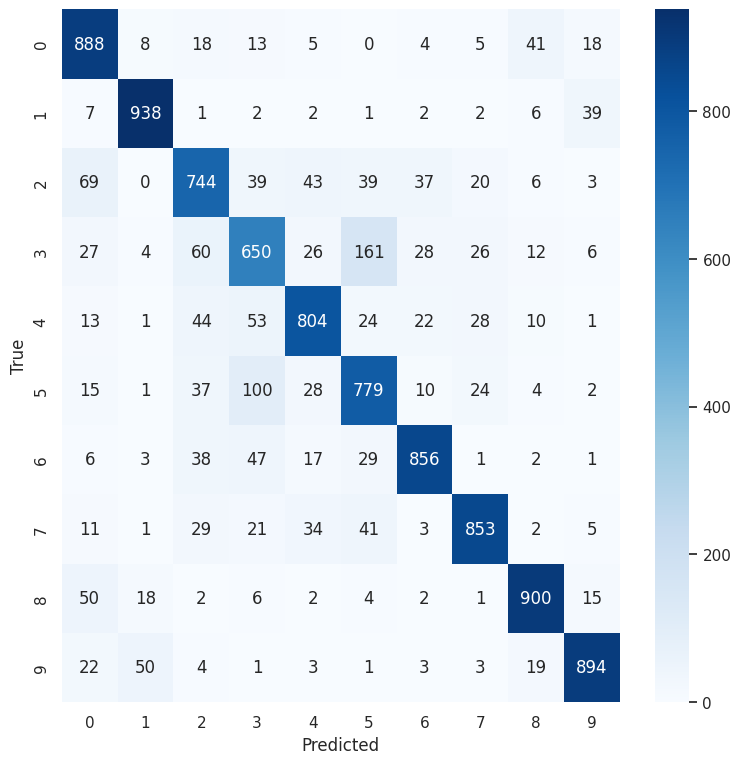

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Convert one-hot encoded labels to single integer labels
y_test_arg = np.argmax(y_test, axis=1)
predictions_arg = np.argmax(predictions, axis=1)

# Now you can create the confusion matrix and classification report
cm = confusion_matrix(y_test_arg, predictions_arg)
print(classification_report(y_test_arg, predictions_arg))

# Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()




313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predictions shape: (10000, 10)
Predicted class indices (first 20): [3 8 8 0 6 6 1 2 3 1 0 9 5 7 9 8 5 7 8 6]


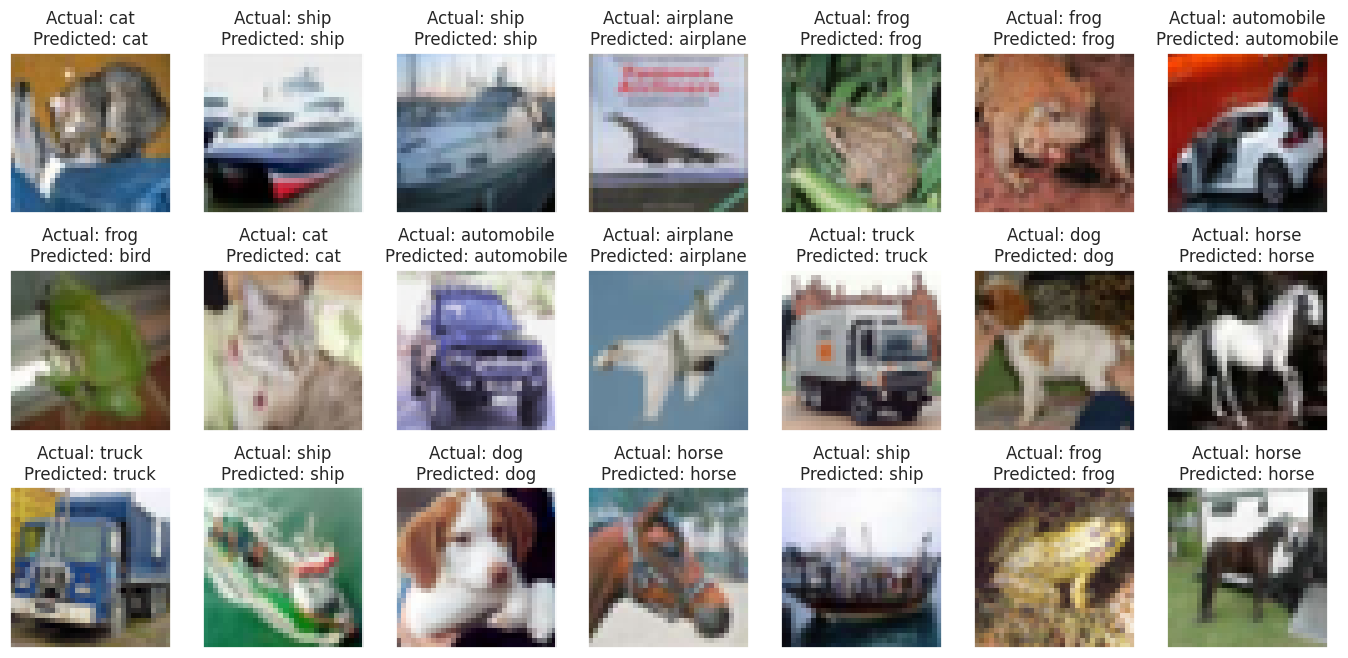

In [ ]:
predictions = model.predict(X_test)

predictions_arg = np.argmax(predictions, axis=1)  # Converts the predictions to class indices
y_test_arg = np.argmax(y_test, axis=1)  # Converts the true labels to class indices

print("Predictions shape:", predictions.shape)  # Should be (10000, 10)
print("Predicted class indices (first 20):", predictions_arg[:20])  # Should be integers representing classes


fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False, sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        # Get the actual and predicted labels for the current index
        actual_label = labels[y_test_arg[index]]
        predicted_label = labels[predictions_arg[index]]

        # Set the title with the actual and predicted labels
        axes[i, j].set_title(f'Actual: {actual_label}\nPredicted: {predicted_label}')

        # Display the corresponding image
        axes[i, j].imshow(X_test[index], cmap='gray')

        # Hide the axes
        axes[i, j].get_xaxis().set_visible(False)
        axes[i, j].get_yaxis().set_visible(False)

        index += 1

# Show the plot
plt.show()
